In [76]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

master_df = "../Project-1/master_data.csv"
client_visits = "../Project-1/Resources/ClientReportServiceVisits.csv"
client_report = "../Project-1/Resources/ClientReport.csv"
client_race = "../Project-1/Resources/ClientReportRace.csv"
client_viralload = "../Project-1/Resources/ClientReportViralLoadTest.csv"

import_md = pd.read_csv(master_df)
service_visit_df = pd.read_csv(client_visits)
client_report_df = pd.read_csv(client_report)
race_df = pd.read_csv(client_race)
viralload_df = pd.read_csv(client_viralload)

viralload_df.head()


C:\Users\dever\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ClientId,ServiceDate,Count
0,1,4/10/2018,20
1,2,4/23/2018,20
2,2,5/23/2018,20
3,3,2/17/2018,20
4,3,10/25/2018,120


In [77]:
#Update RaceID to description
race_df = race_df.replace({'RaceId': 1}, 'White')
race_df = race_df.replace({'RaceId': 2}, 'African American')
race_df = race_df.replace({'RaceId': 3}, 'Asian')
race_df = race_df.replace({'RaceId': 4}, ' Native Hawaiian/Pacific Islander')
race_df = race_df.replace({'RaceId': 5}, 'American Indian or Alaska Native')

race_df.head()

,ClientId,RaceId
0,1,White
1,2,Asian
2,3,White
3,4,White
4,5,African American


In [78]:
#Sum visits by ClientId
service_visits_sum = service_visit_df.groupby("ClientId").sum()
service_visits_sum.head()

,ServiceID,Visits
ClientId,,
1,26,28
2,8,2
3,24,12
4,8,3
5,42,45


In [79]:
#Create bins and groups for ages
bins = [0, 1959, 1969, 1979, 1989, 2019]

group_labels = ["<1960", "1960-1069", "1970-1979", "1980-1989", "1990+"]

age_groups = pd.cut(client_report_df["BirthYear"], bins, labels=group_labels)

#Add age groups to the table
client_report_df["Age Group"] = age_groups
client_report_df.head(10)

,ClientId,ClientDateofBirth,EnrollmentStatusID,BirthYear,EthnicityID,GenderID,PovertyLevelID,HousingStatusID,HivAidsStatusID,RiskScreeningProvidedID,...,ScreenedHepatitisCSinceHivDiagnosisID,ScreenedSubstanceAbuseID,ScreenedMentalHealthID,ReceivedCervicalPapSmearID,PregnantID,SexAtBirthID,HivDiagnosisYear,HivPosTestDate,OamcLinkDate,Age Group
0,1,3/17/1951,1,1951,2.0,1,8,2,2,2,...,2,2.0,3,NaN,NaN,1,2006.0,NaN,NaN,<1960
1,2,9/12/1942,1,1942,2.0,1,8,1,2,1,...,2,1.0,1,NaN,NaN,1,2001.0,NaN,NaN,<1960
2,3,4/21/1964,1,1964,1.0,1,8,1,2,2,...,2,2.0,2,NaN,NaN,1,NaN,NaN,NaN,1960-1069
3,4,12/19/1964,1,1964,2.0,1,8,1,2,2,...,2,2.0,2,NaN,NaN,1,2001.0,NaN,NaN,1960-1069
4,5,1/4/1973,1,1973,2.0,1,8,1,2,1,...,2,2.0,2,NaN,NaN,1,2007.0,NaN,NaN,1970-1979
5,6,8/10/1986,1,1986,2.0,6,9,1,2,1,...,2,2.0,2,NaN,NaN,2,2007.0,NaN,NaN,1980-1989
6,7,10/25/1968,1,1968,2.0,1,8,1,2,1,...,2,1.0,1,NaN,NaN,1,2005.0,NaN,NaN,1960-1069
7,8,4/29/1974,1,1974,2.0,1,8,1,2,1,...,2,2.0,2,NaN,NaN,1,2004.0,NaN,NaN,1970-1979
8,9,3/20/1969,1,1969,2.0,1,8,1,2,1,...,2,2.0,1,NaN,NaN,1,2007.0,NaN,NaN,1960-1069
9,10,4/5/1980,1,1980,1.0,1,13,2,2,1,...,2,2.0,2,NaN,NaN,1,2002.0,NaN,NaN,1980-1989


In [80]:
#Merge RaceID into the main client report
client_report_race = pd.merge(race_df, client_report_df, on="ClientId")
client_report_race.head()

,ClientId,RaceId,ClientDateofBirth,EnrollmentStatusID,BirthYear,EthnicityID,GenderID,PovertyLevelID,HousingStatusID,HivAidsStatusID,...,ScreenedHepatitisCSinceHivDiagnosisID,ScreenedSubstanceAbuseID,ScreenedMentalHealthID,ReceivedCervicalPapSmearID,PregnantID,SexAtBirthID,HivDiagnosisYear,HivPosTestDate,OamcLinkDate,Age Group
0,1,White,3/17/1951,1,1951,2.0,1,8,2,2,...,2,2.0,3,NaN,NaN,1,2006.0,NaN,NaN,<1960
1,2,Asian,9/12/1942,1,1942,2.0,1,8,1,2,...,2,1.0,1,NaN,NaN,1,2001.0,NaN,NaN,<1960
2,3,White,4/21/1964,1,1964,1.0,1,8,1,2,...,2,2.0,2,NaN,NaN,1,NaN,NaN,NaN,1960-1069
3,4,White,12/19/1964,1,1964,2.0,1,8,1,2,...,2,2.0,2,NaN,NaN,1,2001.0,NaN,NaN,1960-1069
4,5,African American,1/4/1973,1,1973,2.0,1,8,1,2,...,2,2.0,2,NaN,NaN,1,2007.0,NaN,NaN,1970-1979


In [81]:
#Merge in visits
client_report_race_visits = pd.merge(client_report_race, service_visits_sum, on="ClientId")
client_report_race_visits.head()

,ClientId,RaceId,ClientDateofBirth,EnrollmentStatusID,BirthYear,EthnicityID,GenderID,PovertyLevelID,HousingStatusID,HivAidsStatusID,...,ScreenedMentalHealthID,ReceivedCervicalPapSmearID,PregnantID,SexAtBirthID,HivDiagnosisYear,HivPosTestDate,OamcLinkDate,Age Group,ServiceID,Visits
0,1,White,3/17/1951,1,1951,2.0,1,8,2,2,...,3,NaN,NaN,1,2006.0,NaN,NaN,<1960,26,28
1,2,Asian,9/12/1942,1,1942,2.0,1,8,1,2,...,1,NaN,NaN,1,2001.0,NaN,NaN,<1960,8,2
2,3,White,4/21/1964,1,1964,1.0,1,8,1,2,...,2,NaN,NaN,1,NaN,NaN,NaN,1960-1069,24,12
3,4,White,12/19/1964,1,1964,2.0,1,8,1,2,...,2,NaN,NaN,1,2001.0,NaN,NaN,1960-1069,8,3
4,5,African American,1/4/1973,1,1973,2.0,1,8,1,2,...,2,NaN,NaN,1,2007.0,NaN,NaN,1970-1979,42,45


In [82]:
clean_viralload = viralload_df.sort_values(by=['ServiceDate']).drop_duplicates(subset='ClientId', keep='last')
clean_viralload.head()

,ClientId,ServiceDate,Count
8530,4145,1/10/2018,232
5037,2539,1/10/2018,20
2908,1487,1/10/2018,20
654,306,1/10/2018,20
5165,2601,1/11/2018,20


In [83]:
viral_age_race = pd.merge(client_report_race_visits, clean_viralload, on="ClientId", how="left")
viral_age_race.head()

,ClientId,RaceId,ClientDateofBirth,EnrollmentStatusID,BirthYear,EthnicityID,GenderID,PovertyLevelID,HousingStatusID,HivAidsStatusID,...,PregnantID,SexAtBirthID,HivDiagnosisYear,HivPosTestDate,OamcLinkDate,Age Group,ServiceID,Visits,ServiceDate,Count
0,1,White,3/17/1951,1,1951,2.0,1,8,2,2,...,NaN,1,2006.0,NaN,NaN,<1960,26,28,4/10/2018,20.0
1,2,Asian,9/12/1942,1,1942,2.0,1,8,1,2,...,NaN,1,2001.0,NaN,NaN,<1960,8,2,5/23/2018,20.0
2,3,White,4/21/1964,1,1964,1.0,1,8,1,2,...,NaN,1,NaN,NaN,NaN,1960-1069,24,12,2/17/2018,20.0
3,4,White,12/19/1964,1,1964,2.0,1,8,1,2,...,NaN,1,2001.0,NaN,NaN,1960-1069,8,3,5/31/2018,20.0
4,5,African American,1/4/1973,1,1973,2.0,1,8,1,2,...,NaN,1,2007.0,NaN,NaN,1970-1979,42,45,5/10/2018,20.0


In [84]:
#Create bins and groups for ages
bins2 = [0, 199, 1000000]

group_labels2 = ["Virally Suppressed", "Non-Virally Suppressed"]

viral_bins = pd.cut(viral_age_race["Count"], bins2, labels=group_labels2)

#Add age groups to the table
viral_age_race["Viral Suppression Status"] = viral_bins
viral_age_race.head(10)

,ClientId,RaceId,ClientDateofBirth,EnrollmentStatusID,BirthYear,EthnicityID,GenderID,PovertyLevelID,HousingStatusID,HivAidsStatusID,...,SexAtBirthID,HivDiagnosisYear,HivPosTestDate,OamcLinkDate,Age Group,ServiceID,Visits,ServiceDate,Count,Viral Suppression Status
0,1,White,3/17/1951,1,1951,2.0,1,8,2,2,...,1,2006.0,NaN,NaN,<1960,26,28,4/10/2018,20.0,Virally Suppressed
1,2,Asian,9/12/1942,1,1942,2.0,1,8,1,2,...,1,2001.0,NaN,NaN,<1960,8,2,5/23/2018,20.0,Virally Suppressed
2,3,White,4/21/1964,1,1964,1.0,1,8,1,2,...,1,NaN,NaN,NaN,1960-1069,24,12,2/17/2018,20.0,Virally Suppressed
3,4,White,12/19/1964,1,1964,2.0,1,8,1,2,...,1,2001.0,NaN,NaN,1960-1069,8,3,5/31/2018,20.0,Virally Suppressed
4,5,African American,1/4/1973,1,1973,2.0,1,8,1,2,...,1,2007.0,NaN,NaN,1970-1979,42,45,5/10/2018,20.0,Virally Suppressed
5,6,African American,8/10/1986,1,1986,2.0,6,9,1,2,...,2,2007.0,NaN,NaN,1980-1989,72,32,8/17/2018,29.0,Virally Suppressed
6,7,White,10/25/1968,1,1968,2.0,1,8,1,2,...,1,2005.0,NaN,NaN,1960-1069,8,28,9/17/2018,20.0,Virally Suppressed
7,8,White,4/29/1974,1,1974,2.0,1,8,1,2,...,1,2004.0,NaN,NaN,1970-1979,8,4,7/11/2018,20.0,Virally Suppressed
8,9,White,3/20/1969,1,1969,2.0,1,8,1,2,...,1,2007.0,NaN,NaN,1960-1069,8,2,8/21/2018,20.0,Virally Suppressed
9,10,White,4/5/1980,1,1980,1.0,1,13,2,2,...,1,2002.0,NaN,NaN,1980-1989,18,6,8/30/2018,20.0,Virally Suppressed


In [85]:
#trim df to needed columns
clean_race_visits = viral_age_race[["RaceId", "EnrollmentStatusID", "Visits", "Viral Suppression Status"]]

#groupby RaceId and create calculated fields
race_count = clean_race_visits.groupby(["RaceId"]).count()
race_visits = clean_race_visits.groupby(["RaceId"]).sum()

total_clients = race_count["EnrollmentStatusID"].sum()
total_visits = race_visits["Visits"].sum()
avg_visits = race_visits["Visits"] / race_count["EnrollmentStatusID"]
race_percent = race_count["EnrollmentStatusID"] / total_clients
visits_percent = race_visits["Visits"] / total_visits
non_viral_suppression_race = race_count["EnrollmentStatusID"] - race_count["Viral Suppression Status"]
perc_viral_suppression = race_count["Viral Suppression Status"] / race_count["EnrollmentStatusID"]


#add columns to DF
race_count["Total Visits"] = race_visits["Visits"]
race_count["Avg Visits"] = avg_visits
race_count["% of Clients"] = race_percent
race_count["% of Visits"] = visits_percent
race_count["Non Virally Suppressed"] = non_viral_suppression_race
race_count["% in Viral Suppression"] = perc_viral_suppression

#format DF
race_count["% of Clients"] = (race_count["% of Clients"]*100).astype(float).map("{:,.2f}%".format)
race_count["% of Visits"] = (race_count["% of Visits"]*100).astype(float).map("{:,.2f}%".format)
race_count["% in Viral Suppression"] = (race_count["% in Viral Suppression"]*100).astype(float).map("{:,.2f}%".format)
race_count["Avg Visits"] = race_count["Avg Visits"].astype(float).map("{:,.2f}".format)

race_count = race_count[["EnrollmentStatusID", "% of Clients", "Total Visits", "Avg Visits", "% of Visits", 
                         "Viral Suppression Status", "Non Virally Suppressed", "% in Viral Suppression"]]

race_count = race_count.rename(columns={"EnrollmentStatusID": "Number of Patients",
                              "Viral Suppression Status": "Virally Suppressed"})


race_count = race_count.sort_values(["Total Visits"])
race_count

,Number of Patients,% of Clients,Total Visits,Avg Visits,% of Visits,Virally Suppressed,Non Virally Suppressed,% in Viral Suppression
RaceId,,,,,,,,
Native Hawaiian/Pacific Islander,17,0.35%,165,9.71,0.45%,16,1,94.12%
American Indian or Alaska Native,70,1.45%,549,7.84,1.48%,67,3,95.71%
Asian,152,3.15%,1156,7.61,3.12%,148,4,97.37%
African American,1809,37.52%,14600,8.07,39.44%,1714,95,94.75%
White,2773,57.52%,20544,7.41,55.50%,2625,148,94.66%


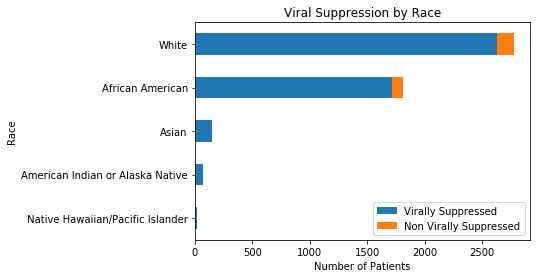

In [86]:
#Define labels and stack by columns
race = ["Native Hawaiian/Pacific Islander", "African American", "American Indian or Alaska Native", "Asian", "White"]
viral_supp = ["Virally Suppressed", "Not Virally Suppressed"]

race_count[['Virally Suppressed', 'Non Virally Suppressed']].plot(kind='barh', stacked=True)
plt.ylabel("Race")
plt.xlabel("Number of Patients")
plt.title("Viral Suppression by Race")
plt.legend(loc=4)

plt.show()

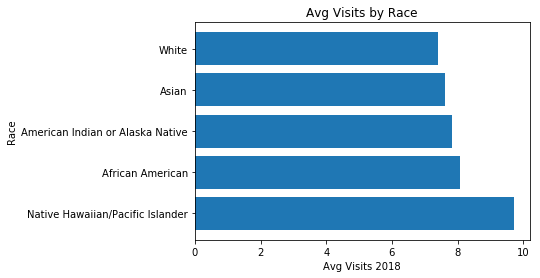

In [164]:
race = ["Native Hawaiian/Pacific Islander", "African American", "American Indian or Alaska Native", "Asian", "White"]

plt.barh(race, avg_visits)
plt.xlabel("Avg Visits 2018")
plt.ylabel("Race")
plt.title("Avg Visits by Race")

plt.show()

In [87]:
#I formally had pie charts here for % of Race and Age of total patient population
#I removed them because they were not overly interesting.
#I have the code saved in another file if we want to add them back


In [95]:
#Keep necessary columns for table
clean_agegroup_visits = viral_age_race[["Age Group", "EnrollmentStatusID", "Visits",  "Viral Suppression Status"]]

#groupby statements and summary fields
age_count = clean_agegroup_visits.groupby("Age Group").count()
age_visits = clean_agegroup_visits.groupby("Age Group").sum()

total_clients_age = age_count["EnrollmentStatusID"].sum()
total_visits_age = age_visits["Visits"].sum()
perc_age_viral_suppression = age_count["Viral Suppression Status"] / age_count["EnrollmentStatusID"]
avg_visits_age = age_visits["Visits"] / age_count["EnrollmentStatusID"]
age_percent = age_count["EnrollmentStatusID"] / total_clients_age
age_visits_percent = age_visits["Visits"] / total_visits_age
non_viral_suppression_age = age_count["EnrollmentStatusID"] - age_count["Viral Suppression Status"]
perc_age_viral_suppression = age_count["Viral Suppression Status"] / age_count["EnrollmentStatusID"]


#Add desired summary fields to DF
age_count["Total Visits"] = age_visits["Visits"]
age_count["Avg Visits"] = avg_visits_age
age_count["% of Clients"] = age_percent
age_count["% of Visits"] = age_visits_percent
age_count["Non Virally Suppressed"] = non_viral_suppression_age
age_count["% in Viral Suppression"] = perc_age_viral_suppression

#format DF
age_count["% of Clients"] = (age_count["% of Clients"]*100).astype(float).map("{:,.2f}%".format)
age_count["% of Visits"] = (age_count["% of Visits"]*100).astype(float).map("{:,.2f}%".format)
age_count["% in Viral Suppression"] = (age_count["% in Viral Suppression"]*100).astype(float).map("{:,.2f}%".format)
age_count["Avg Visits"] = age_count["Avg Visits"].astype(float).map("{:,.2f}".format)

age_count = age_count[["EnrollmentStatusID", "% of Clients", "Total Visits", "Avg Visits", "% of Visits", 
                         "Viral Suppression Status", "Non Virally Suppressed", "% in Viral Suppression"]]

age_count = age_count.rename(columns={"EnrollmentStatusID": "Number of Patients",
                              "Viral Suppression Status": "Virally Suppressed"})


age_count.head()

,Number of Patients,% of Clients,Total Visits,Avg Visits,% of Visits,Virally Suppressed,Non Virally Suppressed,% in Viral Suppression
Age Group,,,,,,,,
<1960,489,10.14%,3871,7.92,10.46%,467,22,95.50%
1960-1069,1060,21.99%,7466,7.04,20.17%,1005,55,94.81%
1970-1979,992,20.58%,7372,7.43,19.92%,943,49,95.06%
1980-1989,1438,29.83%,10805,7.51,29.19%,1366,72,94.99%
1990+,842,17.47%,7500,8.91,20.26%,789,53,93.71%


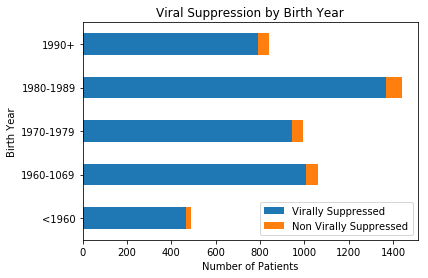

In [120]:
#Create Y-Labels
age = [ "<1960", "1960-1969", "1970-1979", "1980-1989", "1990+"]

#Plot graph and format
age_count[['Virally Suppressed', 'Non Virally Suppressed']].plot(kind='barh', stacked=True)

plt.ylabel("Birth Year")
plt.xlabel("Number of Patients")
plt.title("Viral Suppression by Birth Year")
plt.legend(loc=4)


plt.show()



In [150]:
age_count.head()

,Number of Patients,% of Clients,Total Visits,Avg Visits,% of Visits,Virally Suppressed,Non Virally Suppressed,% in Viral Suppression
Age Group,,,,,,,,
<1960,489,10.14%,3871,7.92,10.46%,467,22,95.50%
1960-1069,1060,21.99%,7466,7.04,20.17%,1005,55,94.81%
1970-1979,992,20.58%,7372,7.43,19.92%,943,49,95.06%
1980-1989,1438,29.83%,10805,7.51,29.19%,1366,72,94.99%
1990+,842,17.47%,7500,8.91,20.26%,789,53,93.71%


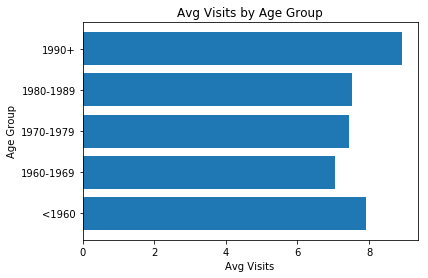

In [158]:
age = [ "<1960", "1960-1969", "1970-1979", "1980-1989", "1990+"]
plt.barh(age, avg_visits_age)
plt.xlabel("Avg Visits")
plt.ylabel("Age Group")
plt.title("Avg Visits by Age Group")

plt.show()


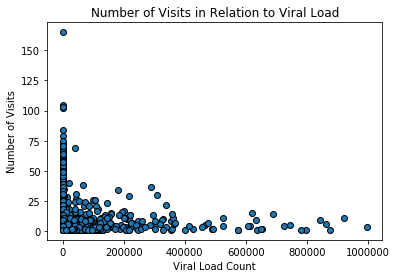

In [101]:
#create scatter plot of # of visits vs viral load count
visits_viralload_scatter = plt.scatter(viral_age_race["Count"], viral_age_race["Visits"], edgecolors="black")
plt.xlabel("Viral Load Count")
plt.ylabel("Number of Visits")
plt.title("Number of Visits in Relation to Viral Load")


plt.show(visits_viralload_scatter)